# Quantum Computing Lab 3: Multi Qubit Gates

In [1]:
import numpy as np
import scipy.linalg as linalg
import cmath

In [2]:


class State:

    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        self.state = np.zeros(2**n_qubits, dtype=np.complex64)
        self.state[0] = 1

    def initialize_state(self, qubit_values):
        assert len(qubit_values) == self.n_qubits
        self.state = np.zeros(2**len(qubit_values), dtype=np.complex64)
        sumOfCoefficients = 0
        for i in range(len(qubit_values)):
            sumOfCoefficients = sumOfCoefficients + qubit_values[i] * 2**(len(qubit_values) - i - 1)
        self.state[sumOfCoefficients] = 1
    
    
    def compute_adjoint(self, matrix):
        matrix = matrix.conjugate()
        matrix = matrix.transpose()
        return matrix

    def is_valid_gate(self, gate):
        adj =  self.compute_adjoint(gate)
        if np.allclose(np.dot(adj,gate), np.eye(int(np.sqrt(gate.size)))) :
            return True
        return False
    

    def create_custom_gate(self, matrix=None, gates=None):
            """Create a custom gate, either from a matrix or by composing other gates."""
            if matrix is not None:
                if self.is_valid_gate(matrix):
                    return matrix
                else:
                    raise ValueError("Matrix is not unitary.")
            elif gates is not None:
                composite_matrix = gates[0]
                for gate in gates[1:]:
                    composite_matrix = np.dot(composite_matrix, gate)
                if self.is_valid_gate(composite_matrix):
                    return composite_matrix
                else:
                    raise ValueError("Composite gate is not unitary.")
            else:
                raise ValueError("Either a matrix or a list of gates is required.")


    def apply_gate(self, gate, n_gate, starting_qubit):
        applied_gate = np.identity(1)

        for i in range(starting_qubit):
            applied_gate = np.kron(applied_gate, np.identity(2))
        
        applied_gate = np.kron(applied_gate, gate)

        for i in range(starting_qubit + n_gate, self.n_qubits):
            applied_gate = np.kron(applied_gate, np.identity(2))

        self.state = np.dot(self.state, applied_gate)
       
    def apply_H_gate(self, target_qubit):
        
        self.apply_gate(np.array([[1, 1], [1, -1]])/np.sqrt(2), 1, target_qubit)
    
    def apply_X_gate(self, target_qubit):
        
        self.apply_gate(np.array([[0, 1], [1, 0]]), 1, target_qubit)
    
    def apply_S_gate(self, target_qubit):
        
        self.apply_gate(np.array([[1, 0], [0, 1j]]), 1, target_qubit)

    def apply_Y_gate(self, target_qubit):

        self.apply_gate(np.array([[0, -1j], [1j, 0]]), 1, target_qubit)

    def apply_T_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0], [0, cmath.exp(1j * np.pi / 4)]]), 1, target_qubit)

    def apply_Z_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0], [0, -1]]), 1, target_qubit)

    def apply_CY_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0 ,0 ,0 ,1j], [0, 0, -1j, 0]]), 2, target_qubit)

    def apply_CZ_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0 ,0 ,1 ,0], [0, 0, 0, -1]]), 2, target_qubit)

    def apply_CT_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0 ,0 ,1 ,0], [0, 0, 0, cmath.exp(1j * np.pi / 4)]]), 2, target_qubit)

    def apply_CS_gate(self, target_qubit):

        self.apply_gate(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0 ,0 ,1 ,0], [0, 0, 0, 1j]]), 2, target_qubit)

    def apply_CNOT_gate(self, target_qubit):
        
        self.apply_gate(np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]]), 2, target_qubit)
    
    def apply_CH_gate(self, target_qubit):
        
        unuPeRadacinaDinDoi = 1 / np.sqrt(2)
        self.apply_gate(np.array([[1, 0, 0, 0], [0, unuPeRadacinaDinDoi, 0, unuPeRadacinaDinDoi], [0, 0, 1, 0], [0, unuPeRadacinaDinDoi, 0, unuPeRadacinaDinDoi]]), 2, target_qubit)
    
    def apply_SWAP_gate(self, target_qubit):
       
        self.apply_gate(np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0 ,0], [0, 0, 0, 1]]), 2, target_qubit)
    
    def apply_CNOT10_gate(self, target_qubit):
        
        self.apply_gate(np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1 ,0], [0, 0, 0, 1]]), 2, target_qubit)
    
    def apply_TOFFOLI_gate(self, target_qubit):
        
        self.apply_gate(self, np.array([[1, 0, 0, 0, 0, 0, 0, 0], [0, 1 ,0 ,0 ,0 ,0 ,0 ,0], [0, 0, 1, 0, 0, 0, 0, 0], [0 ,0 ,0 ,1 ,0 ,0 ,0 ,0], [0 ,0 ,0 ,0 ,1 ,0 ,0 ,0], [0 ,0 ,0 ,0 ,0 ,1 ,0 ,0], [0 ,0 ,0 ,0 ,0 ,0 ,0 ,1], [0 ,0 ,0 ,0 ,0 ,0 ,1 ,0]]), 3, target_qubit)

    def apply_CU_gate(self, target_qubit, U_gate):
        
        CU_gate = np.zeros((4, 4), dtype=np.complex64)
        CU_gate[0:2, 0:2] = np.identity(2)
        CU_gate[2:4, 2:4] = U_gate

        self.apply_gate(CU_gate, 2, target_qubit)

    def compute_probabilities(self):
        probabilities = np.abs(self.state)**2

        return probabilities

    def produce_measurement(self):

        probabilities = self.compute_probabilities()

        # Normalize the probabilities so they sum to 1
        total = sum(probabilities)
        normalized_probabilities = [p / total for p in probabilities]

        result = np.random.choice(len(self.state), p=normalized_probabilities)

        # Convert the result to binary and pad with zeros to match the number of qubits
        result_binary = format(result, '0' + str(self.n_qubits) + 'b')

        # Convert the binary string to a list of integers
        result_list = [int(bit) for bit in result_binary]
        
        return result_list
    
    def produce_measurement_on_qubit(self, qubit):
        
        probabilities = self.compute_probabilities()

        # Randomly choose a state according to these probabilities
        result = np.random.choice(len(self.state), p=probabilities)

        # Convert the result to binary and pad with zeros to match the number of qubits
        result_binary = format(result, '0' + str(self.n_qubits) + 'b')

        # Convert the binary string to a list of integers
        result_list = [int(bit) for bit in result_binary]
        
        return result_list[qubit]
    
    def apply_phase(self, phase):

        phase_factor = cmath.exp(1j * phase)
        phased_state = [phase_factor * amplitude for amplitude in self.state]

        return phased_state

    def compute_density_matrix(self):
        density_matrix = np.outer(self.state, np.conj(self.state))

        return density_matrix

    def display_state(self):
        probabilities = self.compute_probabilities()
       
        for i in range(len(self.state)):
            print(f"State |{format(i, '0' + str(self.n_qubits) + 'b')}>: amplitude = {self.state[i]} with probability = {probabilities[i]}")

    def display_state_amplitudes(self):
        state_amplitudes = self.calculate_state_amplitudes()
        # Display the state amplitudes
        for basis_state, amplitude in state_amplitudes.items():
            print(f"|{basis_state}>: {amplitude}")

    def calculate_state_amplitudes(self):
        # Check if the input state vector is normalized (sum of squared amplitudes is close to 1)
        norm = np.linalg.norm(self.state)
        if not np.isclose(norm, 1.0):
            raise ValueError("Input state vector must be normalized.")

        n_qubits = int(np.log2(len(self.state)))

        # Initialize a dictionary to store the amplitudes of all basis states
        state_amplitudes = {}

        # Iterate through all possible basis states and calculate their amplitudes
        for i in range(2 ** n_qubits):
            basis_state = np.binary_repr(i, width=n_qubits)  # Convert the integer to binary representation
            amplitude = self.state[i]
            state_amplitudes[basis_state] = amplitude

        return state_amplitudes
    
    # Same as above but returns an array of values without the keys
    def calculate_state_amplitudes_arr(self):
        norm = np.linalg.norm(self.state)
        if not np.isclose(norm, 1.0):
            raise ValueError("Input state vector must be normalized.")
        n_qubits = int(np.log2(len(self.state)))
        state_amplitudes = []
        for i in range(2 ** n_qubits):
            amplitude = self.state[i]
            state_amplitudes.append(amplitude)

        return state_amplitudes
    
## Outside of the class functions

def quantum_fidelity_check(rho1, rho2):
    """
    Compute the quantum fidelity between two states.
    
    Parameters:
    rho1, rho2 (np.ndarray): Density matrices of the two states.

    Returns:
    float: The fidelity between rho1 and rho2.
    """

    # Compute the square root of rho1
    sqrt_rho1 = linalg.sqrtm(rho1)

    # Compute the product sqrt_rho1*rho2*sqrt_rho1
    temp = np.dot(np.dot(sqrt_rho1, rho2), sqrt_rho1)

    # Compute the square root of the above product
    sqrtm = linalg.sqrtm(temp)

    # Compute the trace of the square root
    fidelity = np.trace(sqrtm)

    return np.real(fidelity)

In [3]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
qstate.apply_H_gate(0)
qstate.apply_X_gate(1)
qstate.apply_CNOT10_gate(0)
print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.state)

[1, 0, 1, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 1, 0, 0]
[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


In [4]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
x_matrix = np.array([[0, 1], [1, 0]])
h_matrix = np.array([[1, 1], [1, -1]])/np.sqrt(2)
CNOT10_matrix = np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1 ,0], [0, 0, 0, 1]])

custom_x_gate = qstate.create_custom_gate(matrix = x_matrix)
custom_H_gate = qstate.create_custom_gate(matrix = h_matrix)
custom_CNOT10_gate = qstate.create_custom_gate(matrix = CNOT10_matrix)

# print(custom_x_gate)
# print(custom_H_gate)
# print(custom_CNOT10_gate)

qstate.apply_gate(custom_H_gate,1,0)
qstate.apply_gate(custom_x_gate,1,1)
qstate.apply_gate(custom_CNOT10_gate,2,0)


print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.produce_measurement())
print(qstate.state)

[0, 1, 1, 0, 0]
[0, 1, 1, 0, 0]
[1, 0, 1, 0, 0]
[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


In [7]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
x_matrix = np.array([[0, 1], [1, 0]])
h_matrix = np.array([[1, 1], [1, -1]])/np.sqrt(2)
CNOT10_matrix = np.array([[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1 ,0], [0, 0, 0, 1]])

custom_x_gate = qstate.create_custom_gate(matrix = x_matrix)
custom_H_gate = qstate.create_custom_gate(matrix = h_matrix)
custom_CNOT10_gate = qstate.create_custom_gate(matrix = CNOT10_matrix)

# print(custom_x_gate)
# print(custom_H_gate)
# print(custom_CNOT10_gate)

list1 = [custom_H_gate,custom_H_gate,custom_H_gate]
list2 = [custom_x_gate,custom_x_gate]
list3 = [custom_x_gate,custom_x_gate,custom_x_gate]

compose_gate1 = qstate.create_custom_gate(gates = list1)
compose_gate2 = qstate.create_custom_gate(gates = list2)
compose_gate3 = qstate.create_custom_gate(gates = list3)


qstate.apply_gate(compose_gate3,1,0)
# qstate.apply_gate(compose_gate2,1,0)
# qstate.apply_gate(compose_gate3,1,0)


print(qstate.produce_measurement())
# print(qstate.produce_measurement())
# print(qstate.produce_measurement())
print(qstate.state)

[1, 1, 1, 0, 0]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j]


In [8]:
qstate = State(5)
qstate.initialize_state([0,1,1,0,0])
qstate.apply_H_gate(0)
qstate.apply_H_gate(1)
qstate.display_state_amplitudes()
print(qstate.state)

|00000>: 0j
|00001>: 0j
|00010>: 0j
|00011>: 0j
|00100>: (0.4999999999999999+0j)
|00101>: 0j
|00110>: 0j
|00111>: 0j
|01000>: 0j
|01001>: 0j
|01010>: 0j
|01011>: 0j
|01100>: (-0.4999999999999999+0j)
|01101>: 0j
|01110>: 0j
|01111>: 0j
|10000>: 0j
|10001>: 0j
|10010>: 0j
|10011>: 0j
|10100>: (0.4999999999999999+0j)
|10101>: 0j
|10110>: 0j
|10111>: 0j
|11000>: 0j
|11001>: 0j
|11010>: 0j
|11011>: 0j
|11100>: (-0.4999999999999999+0j)
|11101>: 0j
|11110>: 0j
|11111>: 0j
[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0. +0.j  0. +0.j  0. +0.j
  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.5+0.j  0. +0.j  0. +0.j  0. +0.j]


Implement the following circuit using your code. 

Output the following:
 - the magnitude and probability for each output
 - the outputs of 10 random measurements


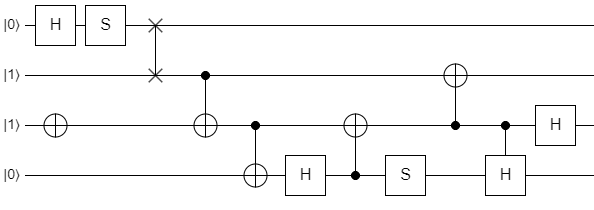

In [10]:
circuit = State(4)
circuit.initialize_state([0,1,1,0])

circuit.apply_H_gate(0)
circuit.apply_X_gate(2)

circuit.apply_S_gate(0)

circuit.apply_SWAP_gate(0)

circuit.apply_CNOT_gate(1)

circuit.apply_CNOT_gate(2)

circuit.apply_H_gate(3)

circuit.apply_CNOT10_gate(2)

circuit.apply_S_gate(3)

circuit.apply_CNOT10_gate(1)

h_matrix = np.array([[1, 1], [1, -1]])/np.sqrt(2)
custom_H_gate = qstate.create_custom_gate(matrix = h_matrix)

circuit.apply_CU_gate(2,custom_H_gate)

circuit.apply_H_gate(2)



circuit.display_state()
# circuit.display_state_amplitudes()


nr_of_measurements = 10
while nr_of_measurements > 0:
    nr_of_measurements-=1
    print(circuit.produce_measurement())

State |0000>: amplitude = 0j with probability = 0.0
State |0001>: amplitude = 0j with probability = 0.0
State |0010>: amplitude = 0j with probability = 0.0
State |0011>: amplitude = 0j with probability = 0.0
State |0100>: amplitude = 0j with probability = 0.0
State |0101>: amplitude = 0j with probability = 0.0
State |0110>: amplitude = 0j with probability = 0.0
State |0111>: amplitude = 0j with probability = 0.0
State |1000>: amplitude = (0.24999999572143217+0.24999999572143217j) with probability = 0.1249999957214322
State |1001>: amplitude = (0.24999999572143217-0.24999999572143217j) with probability = 0.1249999957214322
State |1010>: amplitude = (-0.24999999572143217-0.24999999572143217j) with probability = 0.1249999957214322
State |1011>: amplitude = (-0.24999999572143217+0.24999999572143217j) with probability = 0.1249999957214322
State |1100>: amplitude = (0.24999999572143217+0.24999999572143217j) with probability = 0.1249999957214322
State |1101>: amplitude = (-0.24999999572143217